In [1]:
#Download Training set:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

#Download validation set:
!wget --no-check-certificate \
     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
     -O /tmp/validation-horse-or-human.zip

--2020-06-03 03:21:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 2a00:1450:4013:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   141MB/s    in 1.0s    

2020-06-03 03:21:03 (141 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-06-03 03:21:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 2a00:1450:4013:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/z

In [0]:
#OS library to use OS commands::
import os
#ZipFile library to unzip data:: 
import zipfile  #Class.

#Un-zip Training data::
local_zip = '/tmp/horse-or-human.zip' #Specify downloaded zip file path.
zip_ref = zipfile.ZipFile(local_zip,'r')  # Class with methods to open, read, write, close, list zip files.
zip_ref.extractall('/tmp/horse-or-human') #Un-zip and save into 'temp' folder.

#Un-zip Validation data::
local_zip = '/tmp/validation-horse-or-human.zip' #Specified file path.
zip_ref = zipfile.ZipFile(local_zip,'r') # Class with methods to open, read, write, close, list zip files.
zip_ref.extractall('/tmp/validation-horse-or-human') #Un-zip and save into 'temp' folder.
zip_ref.close()

The contents of the .zip file are extracted to the base directory `/tmp/horse-or-human`, which in turn contain `horses` and `humans` subdirectories.

The **Training set is the data set that is used to tell the Neural Network model `*this is what a horse looks like*` and `*this is what a human looks like*` etc.** 

**IMPORTANT TO NOTE:**:We are not explicitly label the images as horses and humans unlike in Fashion MNIST dataset where we had labelled `this is a 1` or `this is a 7 `like this.

**`ImageGenerator::`** This is used to **read images from sub-directories**, and automatically **label them** from the **name of that directory**.

In [0]:
#Separate "Train" sub-directories to appropriate folders--->

#Directory with our training horse pictures::
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

#Directory with our training human pictures::
train_humans_dir = os.path.join('/tmp/horse-or-human/humans')
#----------------------------------------------------------
#Separate "Test" sub-directories to appropriate folders--->

#Directory with our validation horses pictures::
validation_horses_dir = os.path.join('/tmp/validation-horse-or-human/horses')

#Directory with our validation humans pictures::
validation_humans_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [4]:
type(train_horse_dir),type(train_humans_dir)

(str, str)

In [8]:
train_horse_dir , train_humans_dir , validation_horses_dir , validation_humans_dir

('/tmp/horse-or-human/horses',
 '/tmp/horse-or-human/humans',
 '/tmp/validation-horse-or-human/horses',
 '/tmp/validation-horse-or-human/humans')

Now,let's see what the filenames looks like in the `horses` and `humans` training directories::

In [9]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
print()

train_human_names = os.listdir(train_humans_dir)
print(train_human_names[:10])
print()
#'''
validation_horses_names = os.listdir(validation_horses_dir)
print(validation_horses_names[:10])
print()

validation_humans_names = os.listdir(validation_humans_dir)
print(validation_humans_names[:10])
#'''

['horse11-7.png', 'horse40-1.png', 'horse01-1.png', 'horse24-2.png', 'horse35-9.png', 'horse13-9.png', 'horse33-2.png', 'horse16-9.png', 'horse42-5.png', 'horse36-1.png']

['human01-13.png', 'human09-28.png', 'human11-19.png', 'human17-18.png', 'human16-17.png', 'human07-23.png', 'human10-27.png', 'human11-15.png', 'human11-01.png', 'human15-02.png']

['horse5-103.png', 'horse3-198.png', 'horse5-488.png', 'horse2-201.png', 'horse4-389.png', 'horse5-275.png', 'horse4-202.png', 'horse4-159.png', 'horse5-519.png', 'horse1-127.png']

['valhuman03-14.png', 'valhuman01-07.png', 'valhuman03-00.png', 'valhuman02-23.png', 'valhuman04-11.png', 'valhuman03-12.png', 'valhuman01-09.png', 'valhuman02-21.png', 'valhuman04-14.png', 'valhuman03-09.png']


Let's find out the total number of horse and human images in the directories:

In [10]:
print("[INFO]Total Training Horse images::{}".format(len(train_horse_names)))
print("[INFO]Total Training Human images::{}".format(len(train_human_names)))

[INFO]Total Training Horse images::500
[INFO]Total Training Human images::527


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#Parameters for our graph. We are going to create a graph of 4x4 grid::
nrows = 4
ncloumns = 4
#Index for iterating over an image::
pic_index = 0

In [0]:
pic_index

0

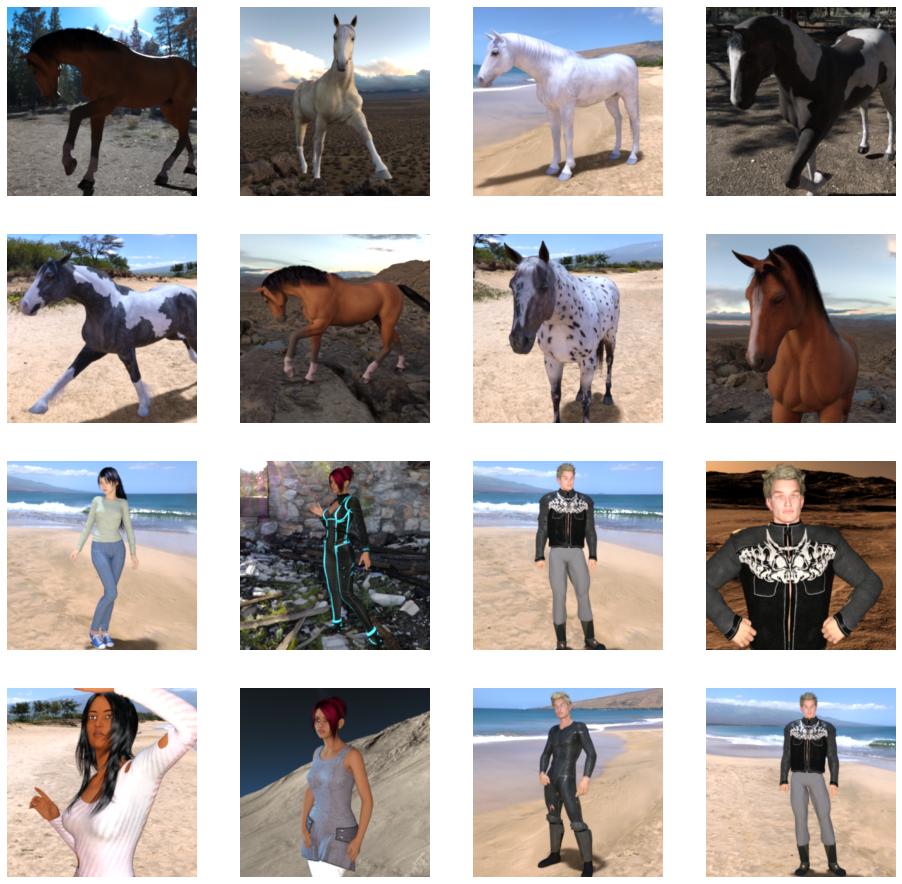

In [12]:
#Set-up Matplotlib figure and size that figure to fit 4 x 4 picture::
fig = plt.gcf() #Get the current figure.
fig.set_size_inches(nrows * 4, ncloumns * 4)

pic_index = pic_index + 8
next_horse_pic = []
next_human_pic = []
for fname in train_horse_names[pic_index-8:pic_index]:
  next_horse_pic.append(os.path.join(train_horse_dir,fname))
for fname in train_human_names[pic_index-8:pic_index]:
  next_human_pic.append(os.path.join(train_humans_dir,fname))

for i,img_path in enumerate(next_horse_pic+next_human_pic):
  #Set up subplots; subplot indices start at 1:
  subplots = plt.subplot(nrows,ncloumns,i+1)
  # Don't show axes (or gridlines)
  subplots.axis('Off')
  #Read the image:
  image = mpimg.imread(img_path)
  plt.imshow(image)
plt.show()

### **Building a Model from Scratch::**

In [13]:
import tensorflow as tf
print(tf.__version__)

2.2.0


**IMPORTANT::** We are dealing here a **`"Two-Class" classification`** problem,which is called ***Binary Classification problem***. So, we are going to use "**Sigmoid Activation**" function so that the output of our network will be a scalar value between 0 and 1.   

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)])

In [15]:
#Print Model Summary::
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### **Configure the Model for Training::**

In [0]:
#Import Optimizer module::
from tensorflow.keras.optimizers import RMSprop

#Compile the Model for Training::
model.compile(optimizer=RMSprop(lr=0.001),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

### **Data Processing::**



1.   Set-up Data generators(for training and validation) that will read pictures from our source folders.
2.   Convert them into **`float32 tensors`**.
3.   Feed them(with their labels)to our Network.

Our generators will yield batches of images of size 300x300 and their labels (binary). In keras, Normalization can be done via `tensorflow.keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows us to **`instantiate generators`** of augmented image batches(and their labels) via **`.flow(data,labels)` or `flow_from_directory(directory)`** These generators can then be used with the **Keras model methods** that accept data generators as inputs:



In [18]:
#Import ImageDataGenerator class/Module::
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#-------------------DataGenerator for Training Data-----------------------------
#Performing some transformation(Normalize the image--<<0-255 to 0 to 1>>)::
#Multiple data point by value provided as rescale-->
train_datagen = ImageDataGenerator(rescale=1/255)

#Create generator instance for Training images::Flow training images in batches of 128 using train_datagen generator-->
train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human', ### Source directory for training images.
                                                    target_size=(300,300),
                                                    class_mode='binary', ### Since we are using binary_crossentropy loss, we need binary labels.
                                                    batch_size=128) ##Batch size for training.
#---------------------DataGenerator for Validation Data-------------------------
#Rescale the validation data<<from range 0 - 255 to 0 - 1>>
validation_datagen = ImageDataGenerator(rescale=1/255)
#Create generator instance for Validation images::Flow Validation images in batches of 128 using validation_datagen generator-->
validation_generator =  validation_datagen.flow_from_directory('/tmp/validation-horse-or-human',### Source directory for training images.
                                                               target_size=(300,300),
                                                               class_mode='binary',
                                                               batch_size=32) ##Batch size during testing.

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [19]:
#Check type of generator instances::
type(train_generator),(type(validation_generator))

(keras_preprocessing.image.directory_iterator.DirectoryIterator,
 keras_preprocessing.image.directory_iterator.DirectoryIterator)

In [20]:
#Look what's inside of it::
train_generator,validation_generator

(<keras_preprocessing.image.directory_iterator.DirectoryIterator at 0x7f5cf05c54e0>,
 <keras_preprocessing.image.directory_iterator.DirectoryIterator at 0x7f5cfa271fd0>)

### **Train the Model::**


In [21]:
model_training_history = model.fit(
                                   train_generator,
                                   epochs=15,
                                   validation_data=validation_generator,
                                   steps_per_epoch=8,
                                   validation_steps=8,
                                   verbose=1)

Epoch 1/15
8/8 [==============================] - 7s 823ms/step - loss: 1.7858 - accuracy: 0.5795 - val_loss: 0.8937 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 7s 845ms/step - loss: 0.5900 - accuracy: 0.7453 - val_loss: 1.0895 - val_accuracy: 0.7031
Epoch 3/15
8/8 [==============================] - 7s 842ms/step - loss: 0.6753 - accuracy: 0.8098 - val_loss: 2.9648 - val_accuracy: 0.6406
Epoch 4/15
8/8 [==============================] - 8s 944ms/step - loss: 0.8008 - accuracy: 0.7976 - val_loss: 3.7307 - val_accuracy: 0.5469
Epoch 5/15
8/8 [==============================] - 7s 832ms/step - loss: 0.1928 - accuracy: 0.9210 - val_loss: 3.5594 - val_accuracy: 0.6641
Epoch 6/15
8/8 [==============================] - 7s 936ms/step - loss: 0.0928 - accuracy: 0.9711 - val_loss: 3.8543 - val_accuracy: 0.6914
Epoch 7/15
8/8 [==============================] - 7s 841ms/step - loss: 0.0305 - accuracy: 0.9933 - val_loss: 4.7714 - val_accuracy: 0.6875
Epoch 8/15
8/8 [====

In [22]:
model_training_history.history

{'accuracy': [0.57953280210495,
  0.7452725172042847,
  0.8097886443138123,
  0.7975528240203857,
  0.9210233688354492,
  0.9710789918899536,
  0.9933258891105652,
  0.9621801972389221,
  0.996662974357605,
  0.9154615998268127,
  0.9944382905960083,
  0.9888765215873718,
  1.0,
  1.0,
  1.0],
 'loss': [1.785814881324768,
  0.5899560451507568,
  0.675264835357666,
  0.8007953763008118,
  0.19279317557811737,
  0.0927838385105133,
  0.030514752492308617,
  0.12702475488185883,
  0.016408102586865425,
  4.590682029724121,
  0.04065890237689018,
  0.033303435891866684,
  0.0050345733761787415,
  0.0025435020215809345,
  0.0016286413883790374],
 'val_accuracy': [0.5,
  0.703125,
  0.640625,
  0.546875,
  0.6640625,
  0.69140625,
  0.6875,
  0.7265625,
  0.80859375,
  0.72265625,
  0.6640625,
  0.7265625,
  0.73046875,
  0.72265625,
  0.72265625],
 'val_loss': [0.8936699032783508,
  1.0894802808761597,
  2.964797019958496,
  3.7306740283966064,
  3.559389114379883,
  3.8542826175689697,
  4

In [23]:
model_training_history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [24]:
model_training_history.model

### **Testing the Model on Real Datapoints(images)::**

In [25]:
#Import required libraries::
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  file_path = '/content/' + fn
  img = image.load_img(file_path,target_size=(300,300))

  #Perform Normalization:
    #1. Convert an image to array.
    #2. Do Normalization.
  img_array = image.img_to_array(img)
  img_array = img_array / 255
  img_array = np.expand_dims(img_array,axis=0)
  print(img_array.shape)
  images = np.vstack([img_array])
  print(images.shape)
  classes = model.predict(images,batch_size=10)
  print(classes)
  print(classes[0])
  if classes[0][0] > 0.5:
    print(fn + ' is human')
  else:
    print(fn + ' is horse') 

Using TensorFlow backend.


Saving instance-horse-1.jpg to instance-horse-1.jpg
Saving instance-horse-2.jpg to instance-horse-2.jpg
Saving instance-horse-3.jpg to instance-horse-3.jpg
(1, 300, 300, 3)
(1, 300, 300, 3)
[[0.00288411]]
[0.00288411]
instance-horse-1.jpg is horse
(1, 300, 300, 3)
(1, 300, 300, 3)
[[0.29076]]
[0.29076]
instance-horse-2.jpg is horse
(1, 300, 300, 3)
(1, 300, 300, 3)
[[0.9968585]]
[0.9968585]
instance-horse-3.jpg is human


In [28]:
type(classes),classes.ndim,classes.shape,classes

(numpy.ndarray, 2, (1, 1), array([[0.9968585]], dtype=float32))

### **Visualizing Intermediate Representations::**

1. Pick a random image from the training set.
2. Generate a figure where each row is the output of a layer,and each image in the row is a specific filter in that output feature map.

In [30]:
model.layers[1:]

In [31]:
for layer in model.layers:
  print(layer.output)

Tensor("conv2d/Identity:0", shape=(None, 298, 298, 16), dtype=float32)
Tensor("max_pooling2d/Identity:0", shape=(None, 149, 149, 16), dtype=float32)
Tensor("conv2d_1/Identity:0", shape=(None, 147, 147, 32), dtype=float32)
Tensor("max_pooling2d_1/Identity:0", shape=(None, 73, 73, 32), dtype=float32)
Tensor("conv2d_2/Identity:0", shape=(None, 71, 71, 64), dtype=float32)
Tensor("max_pooling2d_2/Identity:0", shape=(None, 35, 35, 64), dtype=float32)
Tensor("flatten/Identity:0", shape=(None, 78400), dtype=float32)
Tensor("dense/Identity:0", shape=(None, 512), dtype=float32)
Tensor("dense_1/Identity:0", shape=(None, 1), dtype=float32)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide


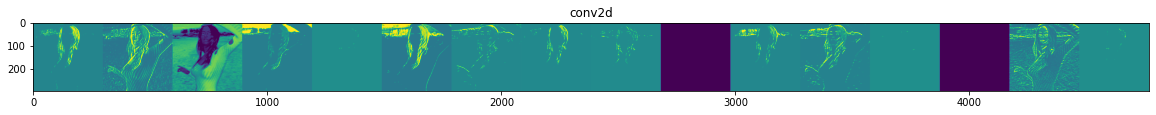

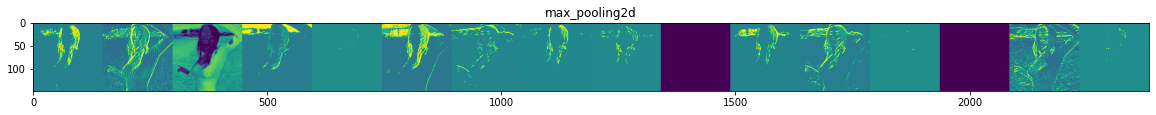

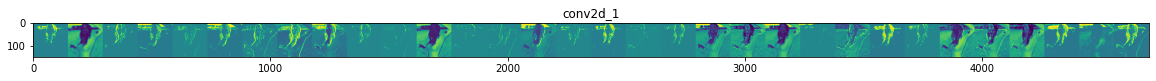

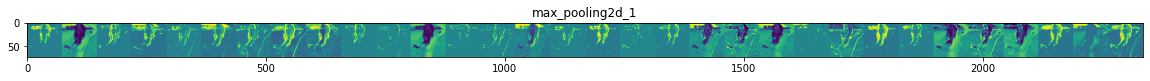

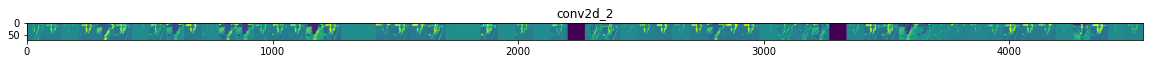

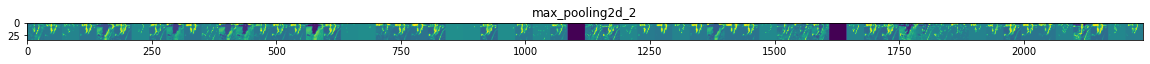

In [66]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array,load_img

#Let's define a new model that will take an image as an input and 
#will output intermediate representations for all layers in the previous 
#model after the first.
successive_outputs = []
for layer in model.layers:
  successive_outputs.append(layer.output)

#Model creation::
#Input-->Img Input
#Output-->previous model's output
#sample structure--> visualization_model = Model(img_input,output_from_previous_model's_layer)
visualization_model = tf.keras.models.Model(inputs=model.input,outputs=successive_outputs)

#Let's prepare a random input image from the training set::
horse_image_files = []
human_image_files = []
#Iterate over Horse image folder::
for file_name in train_horse_names:
  horse_image_files.append(os.path.join(train_horse_dir,file_name))
#Iterate over Human image folder::
for file_name in train_human_names:
  human_image_files.append(os.path.join(train_humans_dir,file_name))
#Random selection between horse or human images::
image_path = random.choice(horse_image_files+human_image_files)

#Treatment on selected Image::
image = load_img(image_path,target_size=(300,300)) ##This is a PIL Image
#Convert the PIL image into numpy array::
image_array = img_to_array(image)  #image_array.shape = (300,300,3)
#Reshape the image_array::
image_array = image_array.reshape((1,)+image_array.shape) #image_array.shape = (1,300,300,3)
#Rescale the array::
image_array = image_array / 255

#Let's pass our image through our Network,thus obtaining all "intermediate representations"
#for this image::
successive_feature_maps = visualization_model.predict(image_array)

#Let's extract the name of the layers to use during plotting of layer representations::
layer_names = []
for layer in model.layers:
  layer_names.append(layer.name)

#Let's display our representations::
for layer_name,feature_map in zip(layer_names,successive_feature_maps):
  #The feature map has shape::(1,size,size,n_features)
  if len(feature_map.shape) == 4:
    #We want to see this intermediate representation for only "conv / maxpool layers",
    #and not for fully connected layers::
    num_features = feature_map.shape[-1] #Extract number of features in feature_map
    map_size = feature_map.shape[1]
    #Tile the images in the following matrix::
    display_grid = np.zeros((map_size,map_size*num_features)) #grid = np.zeros((298,298*16))
    
    #Iterate on each feature_map & Postprocess it::
    for i in range(num_features):
       #Postprocessing each feature-map::
       x = feature_map[0, :, :, i] #Selecting First Feature Map(i=0,1,2,...15)
       #Standardize it::
       # 1-->Substract mean from each value:
       x = (x) - (x.mean())
       # 2-->Divide the result by Standard deviation:
       x = (x) / (x.std())
       x = x * 64
       x = x + 128
       #np.clip(array, array_min, array_max, out=None, **kwargs)
       x = np.clip(x,0,255).astype('uint8')
       #Tile the filter to the zero grid::
       display_grid[:,i*map_size:(i+1)*map_size] = x
     
    #Display the grid::
    scale = 20./ num_features
    plt.figure(figsize=(scale * num_features,scale))
    plt.title(layer_name)
    plt.grid(True)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')

The following cell to terminate the kernel and free memory resources:

In [0]:
import os,signal
os.kill(os.getpid(),signal.SIGKILL)

In [50]:
layer_names

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'flatten',
 'dense',
 'dense_1']

In [57]:
for feature_map in successive_feature_maps:
  print(feature_map.shape)

(1, 298, 298, 16)
(1, 149, 149, 16)
(1, 147, 147, 32)
(1, 73, 73, 32)
(1, 71, 71, 64)
(1, 35, 35, 64)
(1, 78400)
(1, 512)
(1, 1)


In [61]:
grid = np.zeros((298,298*16))
grid.ndim,grid.shape

(2, (298, 4768))

In [62]:
4768/16

298.0

In [64]:
test = grid[:,1*298:(1+1)*298]
test.shape

(298, 298)

In [33]:
print(horse_image_files)

['/tmp/horse-or-human/horses/horse11-7.png', '/tmp/horse-or-human/horses/horse40-1.png', '/tmp/horse-or-human/horses/horse01-1.png', '/tmp/horse-or-human/horses/horse24-2.png', '/tmp/horse-or-human/horses/horse35-9.png', '/tmp/horse-or-human/horses/horse13-9.png', '/tmp/horse-or-human/horses/horse33-2.png', '/tmp/horse-or-human/horses/horse16-9.png', '/tmp/horse-or-human/horses/horse42-5.png', '/tmp/horse-or-human/horses/horse36-1.png', '/tmp/horse-or-human/horses/horse33-5.png', '/tmp/horse-or-human/horses/horse44-1.png', '/tmp/horse-or-human/horses/horse02-3.png', '/tmp/horse-or-human/horses/horse26-2.png', '/tmp/horse-or-human/horses/horse17-9.png', '/tmp/horse-or-human/horses/horse05-7.png', '/tmp/horse-or-human/horses/horse09-8.png', '/tmp/horse-or-human/horses/horse23-5.png', '/tmp/horse-or-human/horses/horse30-0.png', '/tmp/horse-or-human/horses/horse26-8.png', '/tmp/horse-or-human/horses/horse03-0.png', '/tmp/horse-or-human/horses/horse16-4.png', '/tmp/horse-or-human/horses/hor

In [36]:
image_path

'/tmp/horse-or-human/horses/horse45-8.png'

In [39]:
type(image)

PIL.Image.Image

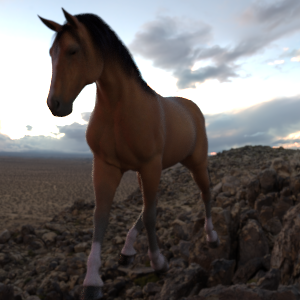

In [40]:
image

In [42]:
type(image_array),image_array.shape

(numpy.ndarray, (300, 300, 3))

In [47]:
image_array.shape

(1, 300, 300, 3)

In [52]:
type(successive_feature_maps)

list

In [54]:
len(successive_feature_maps)

9